# Лабораторная работа 3. Цифровая обработка изображений

## Задание: Восстановить изображение

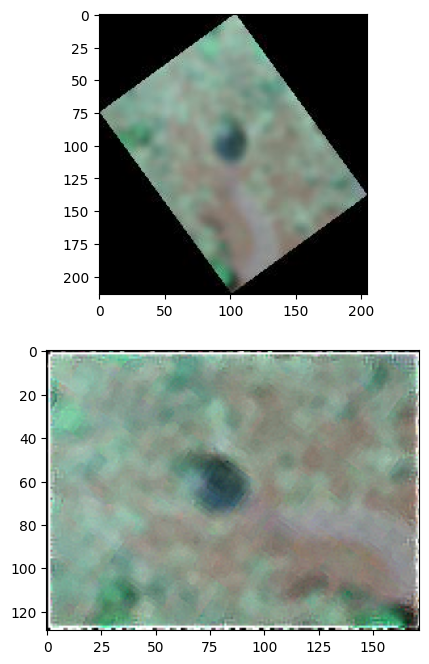

In [36]:
import numpy as np
import cv2 as cv
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

# download image
image = cv2.imread('/content/lab3.jpg')

# image turn
angle = 54
rot_mat = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
rotated_image = cv2.warpAffine(image, rot_mat, (image.shape[1], image.shape[0]))

# core
kernel = np.asarray([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

# mediane filter no noise
median = cv.medianBlur(rotated_image, 3)

# core filter
filtered_image = cv.filter2D(median, -1, kernel)

# take the largest contour
gray = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Data for contour
x, y, w, h = cv2.boundingRect(largest_contour)

# image crop
cropped_image = filtered_image[y:y+h, x:x+w]

# show result
gs = plt.GridSpec(2, 1)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(image)
plt.subplot(gs[1])
plt.imshow(cropped_image)
plt.show()